# California Housing Prices

__Kaggle__: https://www.kaggle.com/camnugent/california-housing-prices

The data contains information from the 1990 California census. The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanitory:

1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

10. oceanProximity: Location of the house w.r.t ocean/sea

__Libraries__

In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

#Scikit-Learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

# Evaluation
from sklearn.metrics import r2_score # R2
from sklearn.metrics import mean_squared_error # RMSE

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data and Explore Data

In [ ]:
dataset = pd.read_csv('housing.csv')
dataset.shape

(20640, 10)

In [ ]:
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
dataset['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

## Cleaning Data

### Filling the NA values form total_bedrooms

In [ ]:
median = dataset['total_bedrooms'].median()

dataset['total_bedrooms'].fillna(median, inplace=True)

### Transforming Categorical Values - One Hot Encoding

In [ ]:
# Select the categories
hcategories = dataset[['ocean_proximity']]

In [ ]:
# Declare the encoder and fit transform
encoder = OneHotEncoder()
housingCat = encoder.fit_transform(dataset[['ocean_proximity']])

In [ ]:
# From SciPy matrix to a NumPy array
array = housingCat.toarray()
array

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
# Encoder categories
encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
encoderDF = pd.DataFrame(array, columns=encoder.categories_)

In [ ]:
encoderDF

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
20635,0.0,1.0,0.0,0.0,0.0
20636,0.0,1.0,0.0,0.0,0.0
20637,0.0,1.0,0.0,0.0,0.0
20638,0.0,1.0,0.0,0.0,0.0


In [ ]:
dataset = pd.concat([dataset, encoderDF], axis=1).drop(['ocean_proximity'], axis=1)
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,"(<1H OCEAN,)","(INLAND,)","(ISLAND,)","(NEAR BAY,)","(NEAR OCEAN,)"
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0


### Analysis Median House Value

In [ ]:
dataset[dataset['median_house_value'] < 0]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,"(<1H OCEAN,)","(INLAND,)","(ISLAND,)","(NEAR BAY,)","(NEAR OCEAN,)"


### Outlier Analysis

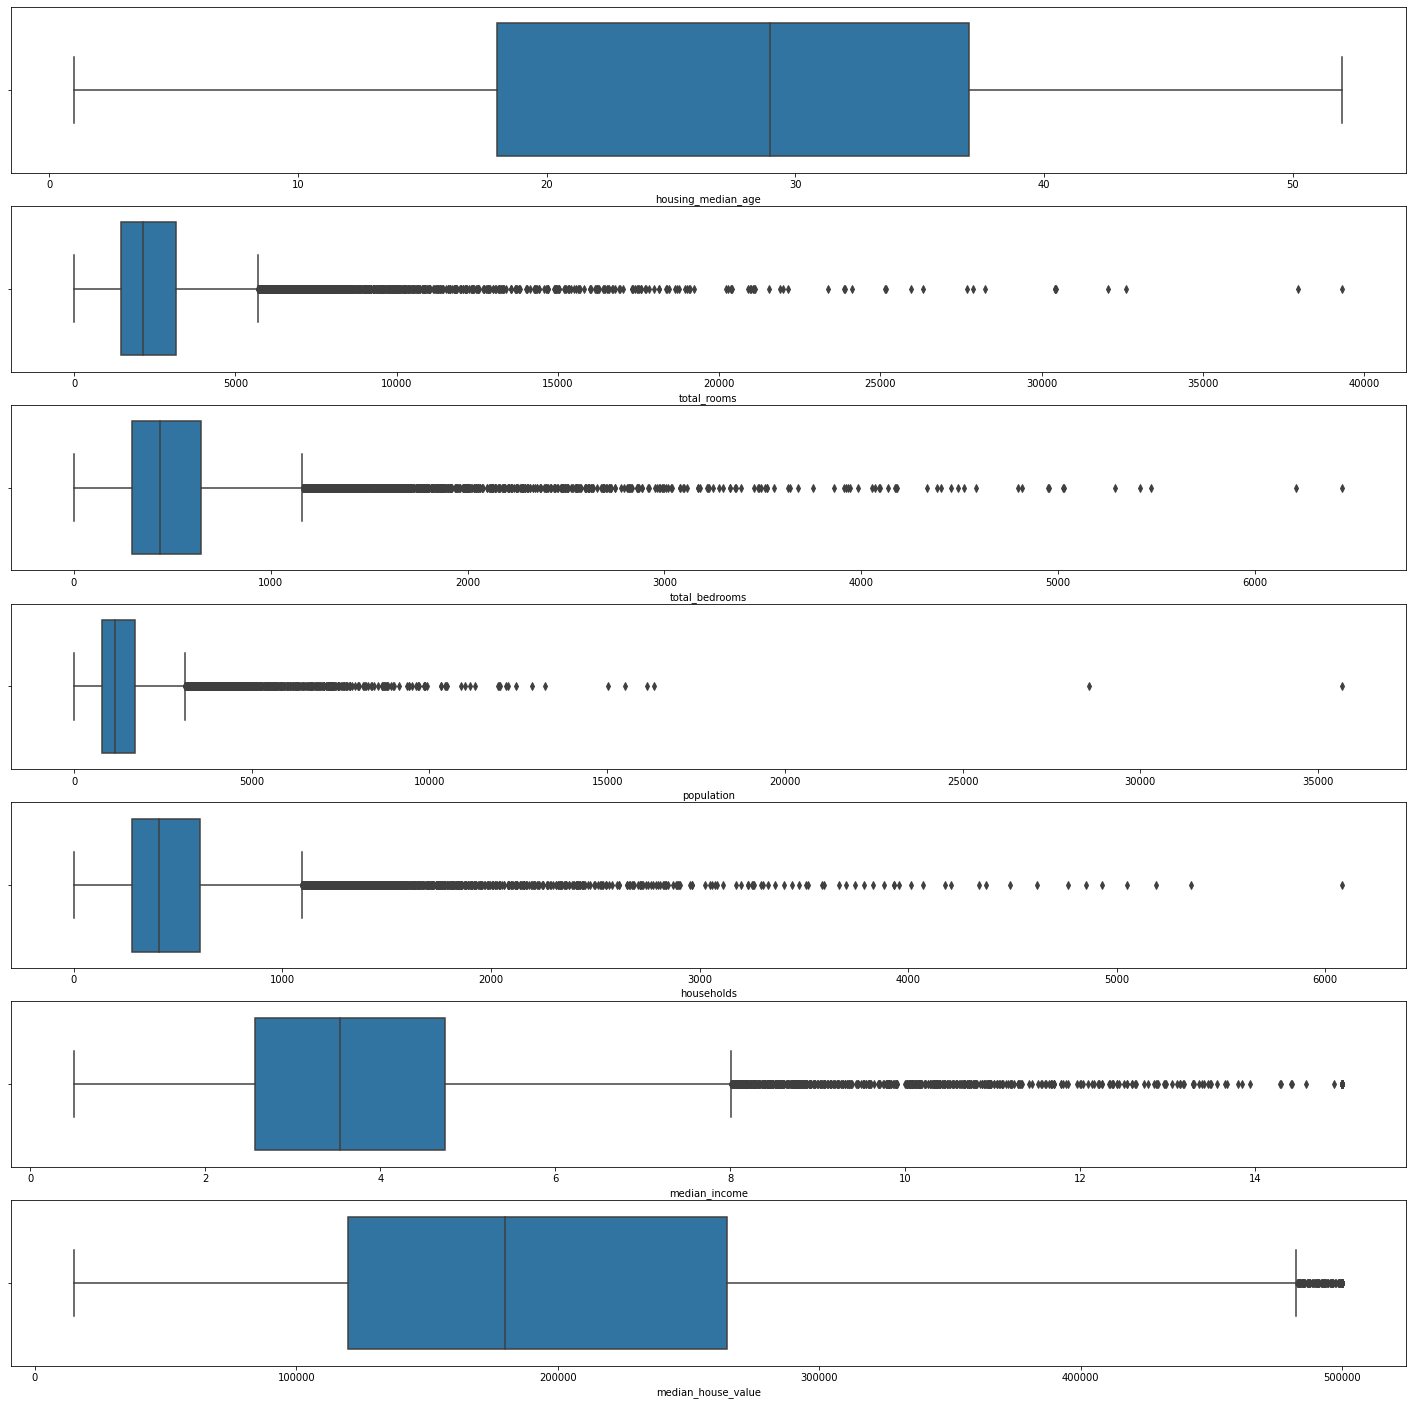

In [ ]:
fig, axs = plt.subplots(7,1, figsize = (25,25))
plt_age = sns.boxplot(dataset['housing_median_age'], ax = axs[0])
plt_rooms = sns.boxplot(dataset['total_rooms'], ax = axs[1])
plt_bedrooms = sns.boxplot(dataset['total_bedrooms'], ax = axs[2])
plt_population = sns.boxplot(dataset['population'], ax = axs[3])
plt_households = sns.boxplot(dataset['households'], ax = axs[4])
plt_income = sns.boxplot(dataset['median_income'], ax = axs[5])
plt_value = sns.boxplot(dataset['median_house_value'], ax = axs[6])
plt.show()

###### Drop Median House Value Outliers

In [ ]:
Q1 = dataset.median_house_value.quantile(0.25)
Q3 = dataset.median_house_value.quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[(dataset.median_house_value >= Q1 - 1.5*IQR) & (dataset.median_house_value <= Q3 + 1.5*IQR)]

In [ ]:
dataset.shape

(19569, 14)

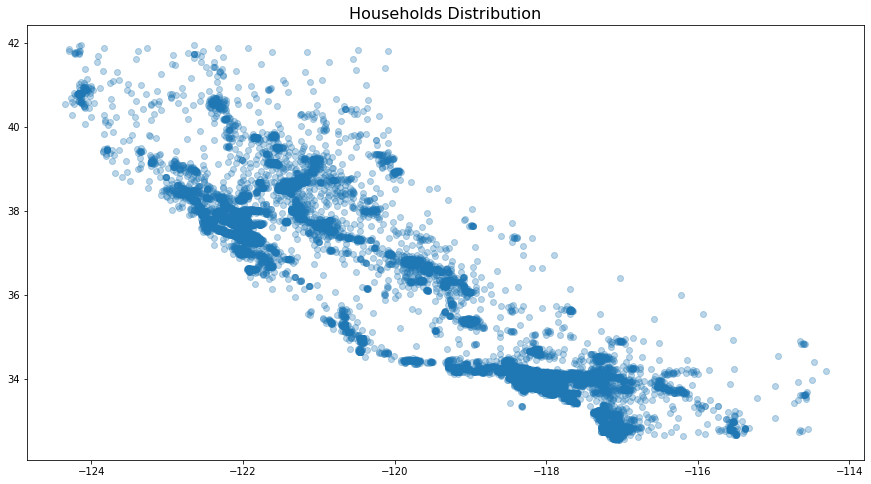

In [ ]:
# Plot Geographic Data

plt.figure(figsize=(15,8))
plt.scatter(dataset['longitude'], dataset['latitude'], alpha=0.3)
plt.title("Households Distribution",size=16)
plt.show()

### Split Data

In [ ]:
X = dataset.drop(columns=['median_house_value'])
y = dataset.median_house_value

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

### Build, Train and Predict

In [ ]:
lr = LinearRegression(normalize=True)
lr = lr.fit(X_train, y_train)

In [ ]:
y_pred = lr.predict(X_test)

### Evaluate the Model

In [ ]:
lr.score(X_test, y_test)

0.623544270258648

In [ ]:
lr_mse = mean_squared_error(y_test, y_pred)
lr_rmse = np.sqrt(lr_mse)
lr_rmse

59004.566217040905

In [ ]:
print('Mean Squared Error: %.4f' % mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error %0.4f' %lr_rmse)
print('Coefficient of Determination (r2) %.4f' % r2_score(y_test, y_pred))

Mean Squared Error: 3481538834.4612
Root Mean Squared Error 59004.5662
Coefficient of Determination (r2) 0.6235


In [ ]:
coeff = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])

print('Intercept: %.4f' %lr.intercept_)
print('Coefficients:')
coeff

Intercept: 71363987139469352.0000
Coefficients:


,Coefficient
longitude,-2.373296e+04
latitude,-2.184066e+04
housing_median_age,8.056030e+02
total_rooms,-4.460567e+00
total_bedrooms,5.945219e+01
population,-3.457545e+01
households,7.507524e+01
median_income,3.674149e+04
"(<1H OCEAN,)",-7.136399e+16
"(INLAND,)",-7.136399e+16


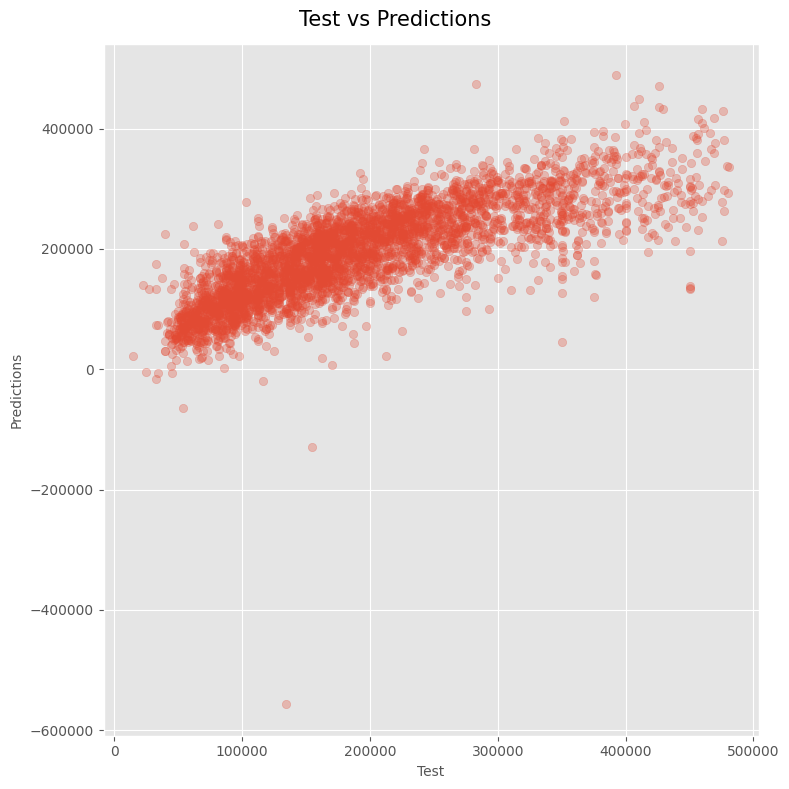

In [ ]:
# Plotting y_test and y_pred

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(y_test, y_pred, alpha=0.3)
plt.suptitle('Test vs Predictions', fontsize=15)              # Plot heading
plt.xlabel('Test', fontsize=10)                               # X-label
plt.ylabel('Predictions', fontsize=10)                        # Y-label


fig.tight_layout()

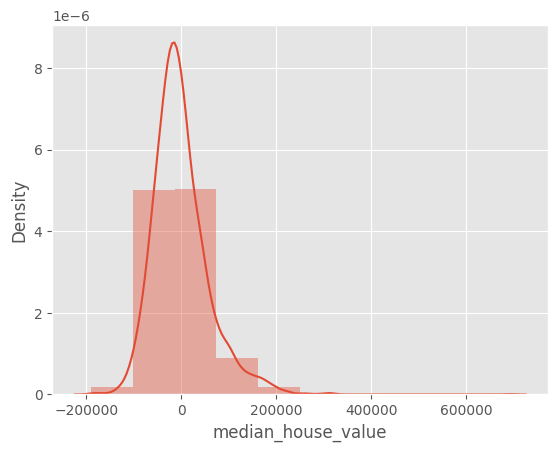

In [ ]:
sns.distplot((y_test-y_pred), bins=10)
plt.show()

This analysis focuses on the behavior of telecom customers who are more likely to leave the platform. I intend to find out the most striking behavior of customers through EDA and later on use some of the predictive analytics techniques to determine the customers who are most likely to churn.

About the data: (As provided in the overview/description)

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

# **Bank Customer Churn Prediction Capstone Project **

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve


https://www.kaggle.com/code/farazrahman/telco-customer-churn-logisticregression/input


In [9]:
data = pd.read_csv("/content/sample_data/WA_Fn-UseC_-Telco-Customer-Churn.csv")


print("First 5 rows:")
print(data.head())


First 5 rows:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies       

In [10]:
print("\nData Info:")
print(data.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-nul

In [11]:
print("\nCheck for missing values:")
print(data.isnull().sum())


Check for missing values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


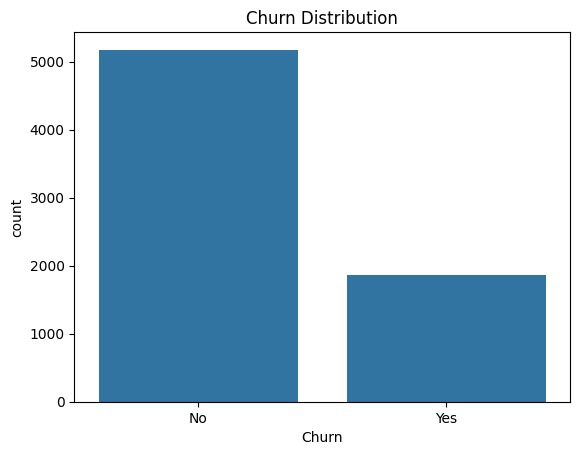

In [12]:
# --- Step 2: Exploratory Data Analysis (EDA) ---
# Distribution of churn column
sns.countplot(x='Churn', data=data)
plt.title('Churn Distribution')
plt.show()

In [13]:
# Checking correlation between numerical features and churn
print("\nCorrelation with churn (encoded as 0/1):")
data['Churn_Encoded'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
print(data[numeric_cols].corr()['Churn_Encoded'].sort_values(ascending=False))


Correlation with churn (encoded as 0/1):
Churn_Encoded     1.000000
MonthlyCharges    0.193356
SeniorCitizen     0.150889
tenure           -0.352229
Name: Churn_Encoded, dtype: float64


/tmp/ipython-input-2970261845.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Churn'] == 'No']['tenure'], shade=True, label='No Churn')
/tmp/ipython-input-2970261845.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['Churn'] == 'Yes']['tenure'], shade=True, label='Churn')


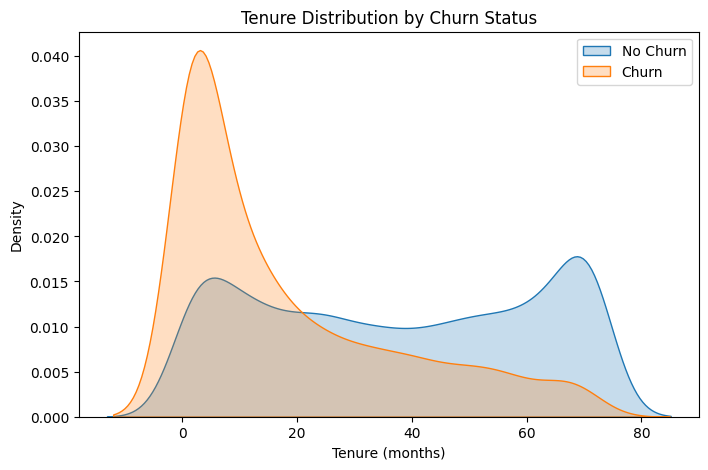

In [14]:
# Plot tenure distribution by churn status
plt.figure(figsize=(8,5))
sns.kdeplot(data=data[data['Churn'] == 'No']['tenure'], shade=True, label='No Churn')
sns.kdeplot(data=data[data['Churn'] == 'Yes']['tenure'], shade=True, label='Churn')
plt.title('Tenure Distribution by Churn Status')
plt.xlabel('Tenure (months)')
plt.legend()
plt.show()

In [15]:
# --- Step 3: Data Preprocessing ---
# Drop customerID as it's not a predictive feature
data.drop(['customerID'], axis=1, inplace=True)

# Convert total charges to numeric, coerce errors (some spaces were present)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Handle missing values in TotalCharges (simple imputation)
print("Missing values in TotalCharges:", data['TotalCharges'].isnull().sum())
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

# Encode categorical variables using LabelEncoder or get_dummies
# Binary columns: Yes/No to 1/0
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    data[col] = data[col].map({'Yes': 1, 'No': 0})

# Columns with multiple categories - one hot encoding
multi_cat_cols = [
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod', 'gender'
]
data = pd.get_dummies(data, columns=multi_cat_cols, drop_first=True)

Missing values in TotalCharges: 11


/tmp/ipython-input-1844164944.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


In [16]:
# --- Step 4: Split Data for Training and Testing ---
X = data.drop('Churn', axis=1)
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# --- Step 5: Feature Scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# --- Step 6: Model Building and Training ---
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [19]:
# --- Step 7: Model Evaluation ---
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1036
           1       1.00      1.00      1.00       373

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



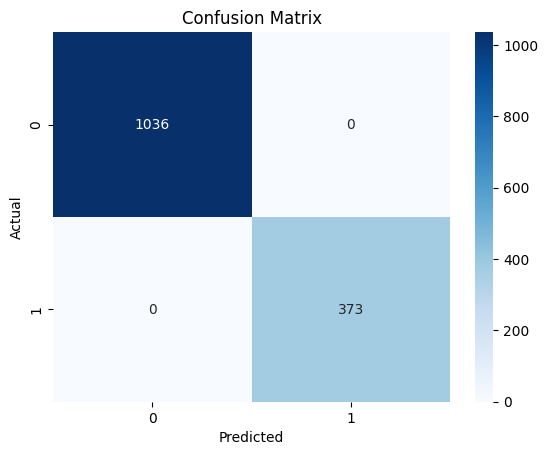

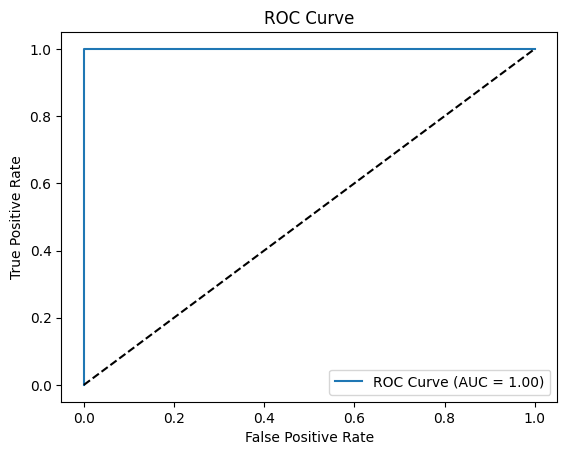

In [20]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()